In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import randint
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



In [90]:
df = pd.read_csv("./us_accidents_road_data.csv", index_col=0)
# df = df.sample(n = 500000)
df.head()


,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,3,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-2,2,False,False,False,False,False,False,False,False,False,False,False,False,False
2,A-3,2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,A-4,2,False,False,False,False,False,False,False,False,False,False,False,False,False
4,A-5,3,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
x = df.drop(['Severity', 'ID'], axis=1)
y = df["Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [92]:
# #****UNDER SAMPLING CODE SNIPPET
# Summarize class distribution.
print("Before undersampling: ", Counter(y_train))
# #
undersample = RandomUnderSampler()
x_train, y_train = undersample.fit_resample(x_train, y_train)
#
# Summarize new class distribution.
print("After undersampling: ", Counter(y_train))

Before undersampling:  Counter({2: 1900101, 3: 115987, 4: 98354, 1: 19564})
After undersampling:  Counter({1: 19564, 2: 19564, 3: 19564, 4: 19564})


In [93]:
# Summarize class distribution.
# print("Before oversampling: ",Counter(y_train))
# #
# ros = RandomOverSampler()
# x_train, y_train = ros.fit_resample(x_train, y_train)
# #
# # Summarize new class distribution.
# print("After oversampling: ", Counter(y_train))

In [94]:
nn = MLPClassifier(solver='adam', max_iter=50)


nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)
print(y_pred)
print(nn.get_params())

[2 1 2 ... 2 2 2]
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 50, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}



Accuracy: 0.7215689913064993
Precision: [0.04499156 0.90233043 0.10720185 0.05395626]
Recall: [0.46016335 0.7922056  0.21069584 0.02043302]
f1 score: [0.08196879 0.84368961 0.14210222 0.02964108]
29
3


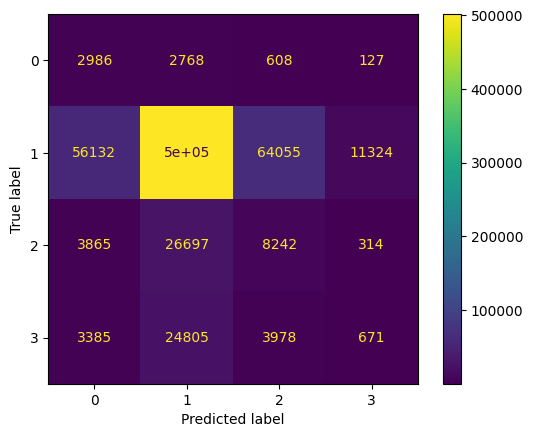

In [95]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred, average = None)
model_recall = recall_score(y_test, y_pred, average = None)
model_f1 = f1_score(y_test, y_pred, average = None)

print("\nAccuracy:", model_accuracy)
print("Precision:", model_precision)
print("Recall:", model_recall)
print("f1 score:", model_f1)

print(nn.n_iter_)
print(nn.n_layers_)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()